In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys

sys.path.append("../")

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

from src.config import PROCESSED_DHF1K_PATH, SEED
from src.datasets.dhf1k_dataset import DHF1KDataset
from src.utils.file import get_paths_recursive
from src.datasets.dhf1k_dataset import get_dataloaders

SEQUENCE_LENGTH = 5

In [ ]:
sample_folder_paths = get_paths_recursive(folder_path=PROCESSED_DHF1K_PATH, match_pattern="*", path_type="d", recursive=False)
train_loader, val_loader, test_loader = get_dataloaders(
    sample_folder_paths=sample_folder_paths,
    sequence_length=SEQUENCE_LENGTH,
    with_transforms=True,
    batch_size=1,
    train_split = 0.8,
    val_split = 0.1,
    test_split = 0.1,
    train_shuffle=True,
    n_workers=0,
    seed=SEED,
)


🌱 Setting the seed to 0 for generating dataloaders.


torch.Size([1, 5, 3, 331, 331])


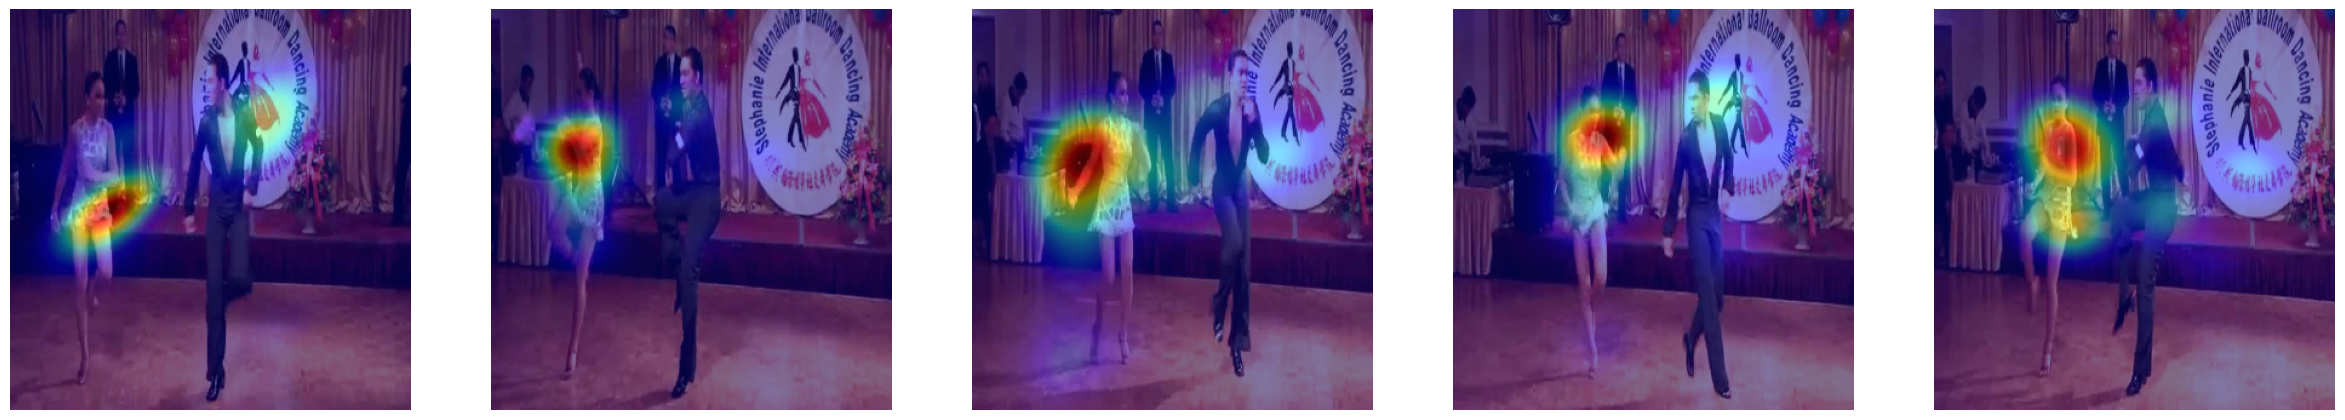

In [68]:
sample = next(iter(train_loader))
frames, ground_truths, global_ground_truth = sample

print(frames.shape)

from matplotlib import pyplot as plt
plt.figure(figsize=(30, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(frames[0][i].permute(1, 2, 0))
    plt.imshow(ground_truths[0][i], alpha=0.5, cmap="jet")
    plt.axis("off")
plt.show()